<a href="https://colab.research.google.com/github/SudeshnaGhoshOfficial/Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load datasets
df_train = pd.read_csv("/content/fraudTrain.csv")
df_test = pd.read_csv("/content/fraudTest.csv")

display(df_train.head())
display(df_test.head())


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Shape of df_train: (1296675, 23)
Shape of df_test: (555719, 23)

Info for df_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  i

None


Info for df_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long             

None


Unique values per column (df_train):
Unnamed: 0: 1296675
trans_date_trans_time: 1274791
cc_num: 983
merchant: 693
category: 14
amt: 52928
first: 352
last: 481
gender: 2
street: 983
city: 894
state: 51
zip: 970
lat: 968
long: 969
city_pop: 879
job: 494
dob: 968
trans_num: 1296675
unix_time: 1274823
merch_lat: 1247805
merch_long: 1275745
is_fraud: 2

Unique values per column (df_test):
Unnamed: 0: 555719
trans_date_trans_time: 544760
cc_num: 924
merchant: 693
category: 14
amt: 37256
first: 341
last: 471
gender: 2
street: 924
city: 849
state: 50
zip: 912
lat: 910
long: 910
city_pop: 835
job: 478
dob: 910
trans_num: 555719
unix_time: 544760
merch_lat: 546490
merch_long: 551770
is_fraud: 2

Missing values (df_train):


,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0



Missing values (df_test):


,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


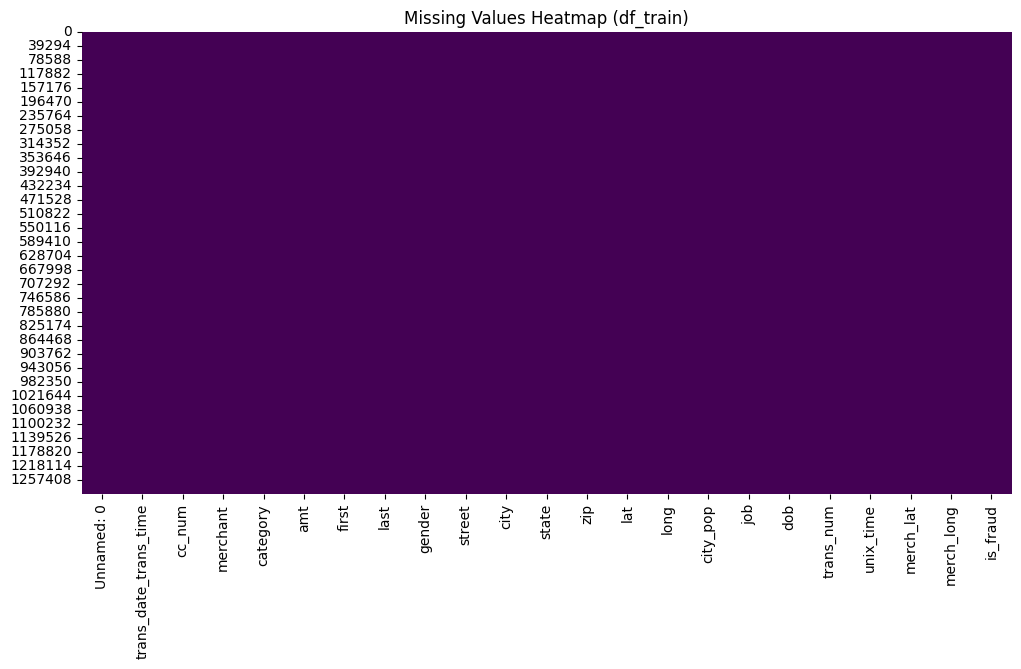

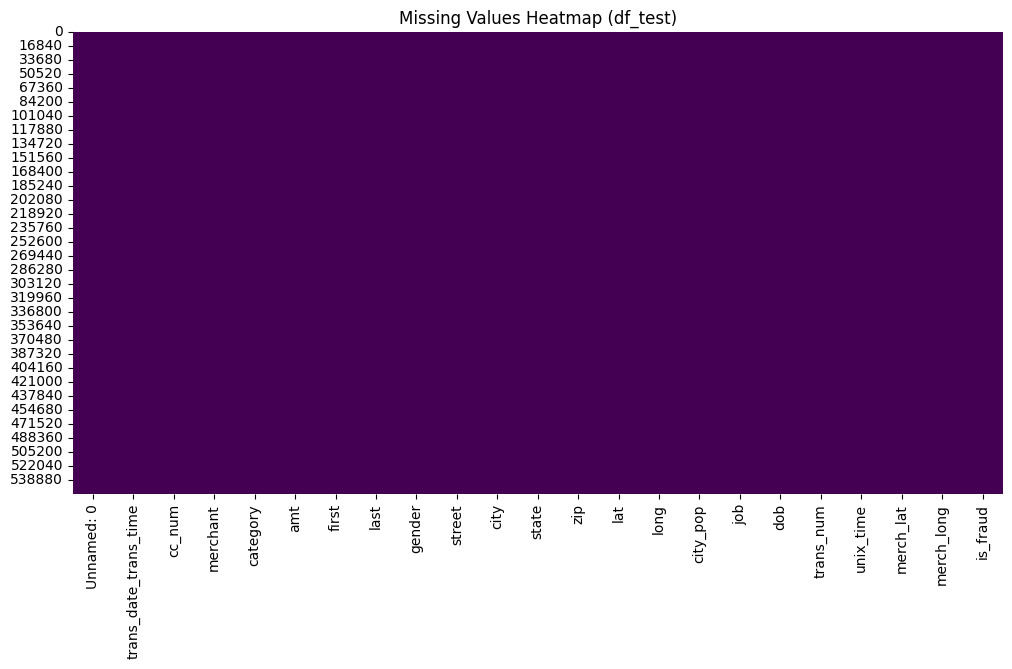

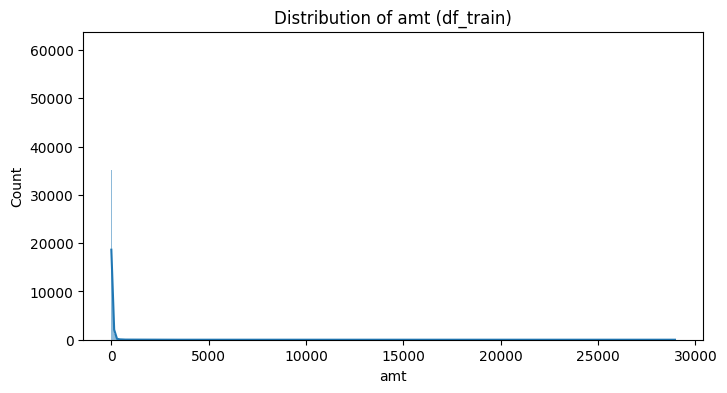

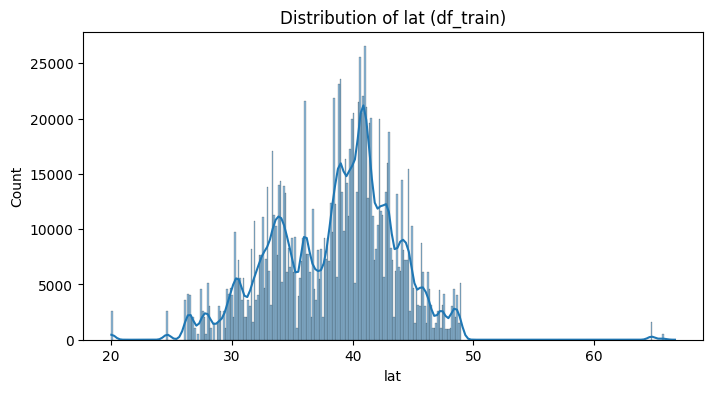

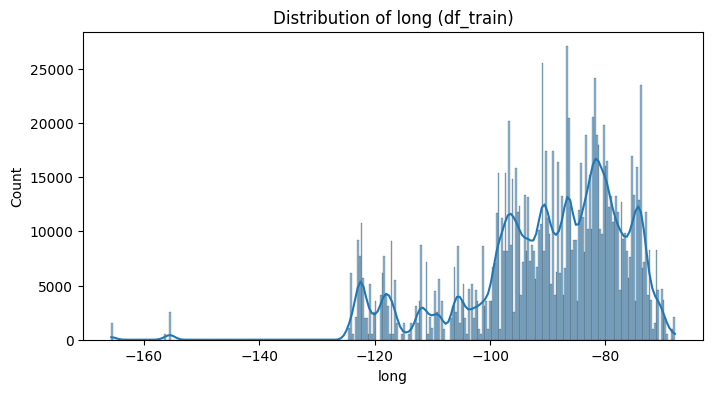

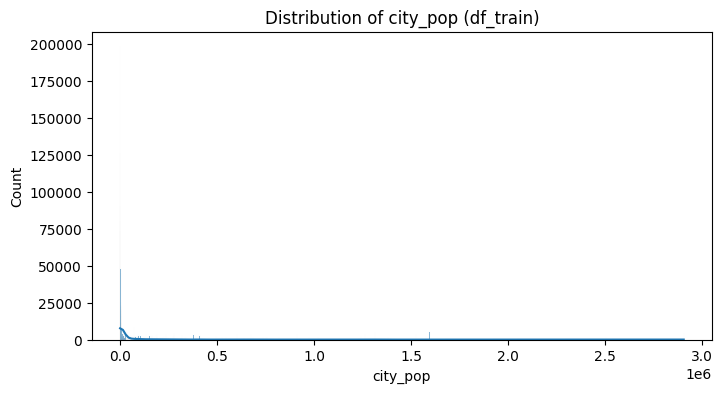

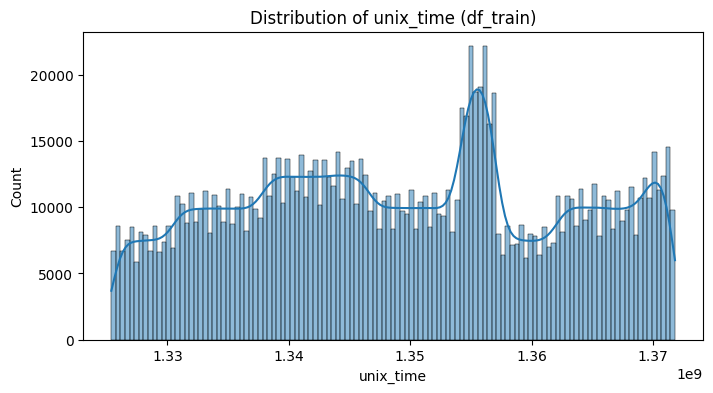


Class Proportions (df_train):
is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


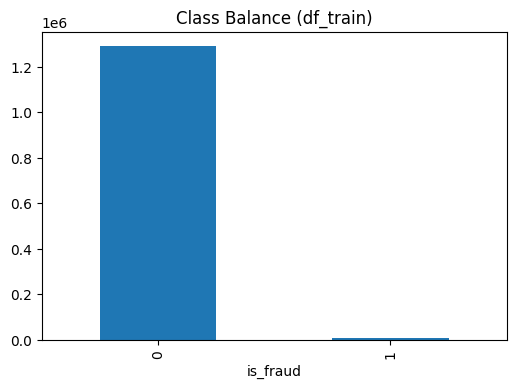


Class Proportions (df_test):
is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64


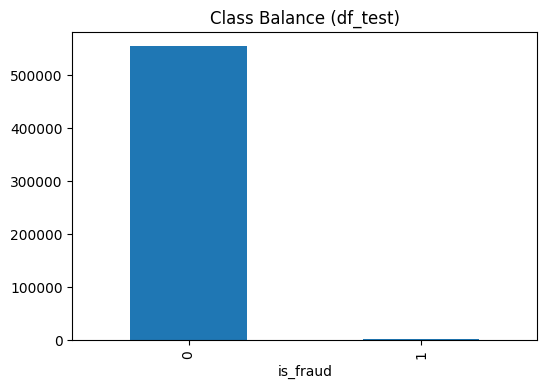

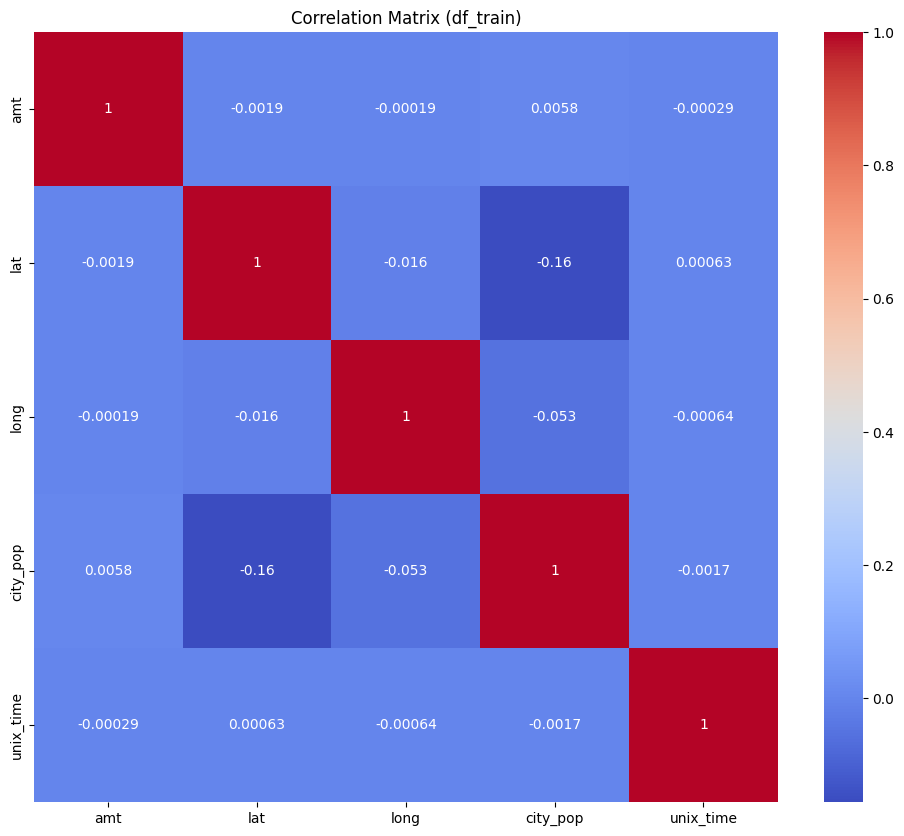

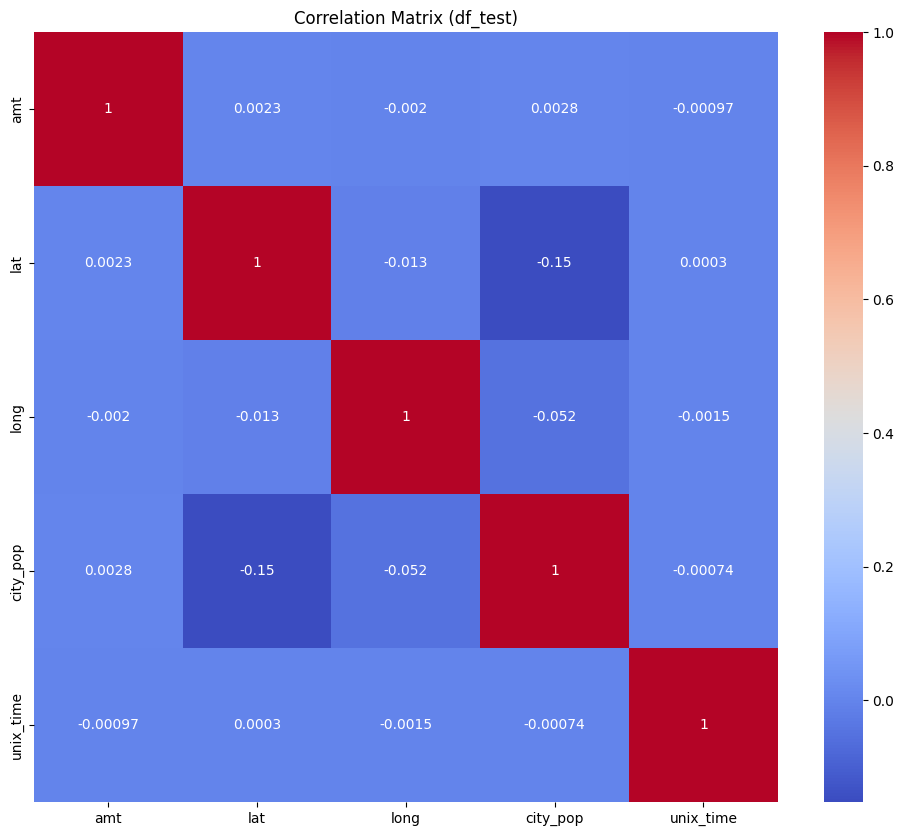

In [ ]:
#DATA EXPLORATION


# Data Overview
print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)
print("\nInfo for df_train:")
display(df_train.info())
print("\nInfo for df_test:")
display(df_test.info())

print("\nUnique values per column (df_train):")
for col in df_train.columns:
    print(f"{col}: {df_train[col].nunique()}")

print("\nUnique values per column (df_test):")
for col in df_test.columns:
    print(f"{col}: {df_test[col].nunique()}")


# Missing Values
print("\nMissing values (df_train):")
display(df_train.isnull().sum())
print("\nMissing values (df_test):")
display(df_test.isnull().sum())

plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (df_train)')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df_test.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (df_test)')
plt.show()

# Data Types and Distributions (example for a few numerical features)
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_train[feature], kde=True)
    plt.title(f'Distribution of {feature} (df_train)')
    plt.show()

# Class Imbalance
print("\nClass Proportions (df_train):")
print(df_train['is_fraud'].value_counts(normalize=True) * 100)
plt.figure(figsize=(6, 4))
df_train['is_fraud'].value_counts().plot(kind='bar')
plt.title('Class Balance (df_train)')
plt.show()

print("\nClass Proportions (df_test):")
print(df_test['is_fraud'].value_counts(normalize=True) * 100)
plt.figure(figsize=(6, 4))
df_test['is_fraud'].value_counts().plot(kind='bar')
plt.title('Class Balance (df_test)')
plt.show()


# Correlation Analysis
plt.figure(figsize=(12, 10))
sns.heatmap(df_train[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (df_train)')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df_test[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (df_test)')
plt.show()

LogisticRegression Metrics:
Accuracy: 0.9171
Precision: 0.9286
Recall: 0.6951
F1 Score: 0.7951
ROC-AUC: 0.8395

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95    368229
           1       0.93      0.70      0.80    110884

    accuracy                           0.92    479113
   macro avg       0.92      0.84      0.87    479113
weighted avg       0.92      0.92      0.91    479113



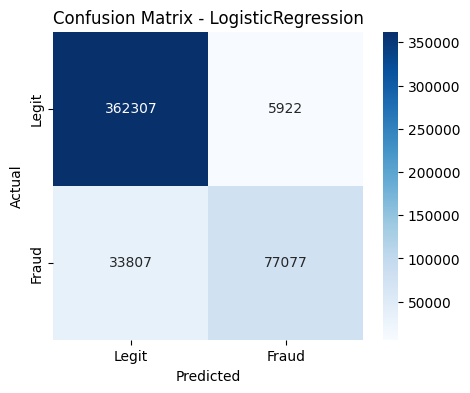

DecisionTreeClassifier Metrics:
Accuracy: 0.9788
Precision: 0.9438
Recall: 0.9658
F1 Score: 0.9547
ROC-AUC: 0.9742

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    368229
           1       0.94      0.97      0.95    110884

    accuracy                           0.98    479113
   macro avg       0.97      0.97      0.97    479113
weighted avg       0.98      0.98      0.98    479113



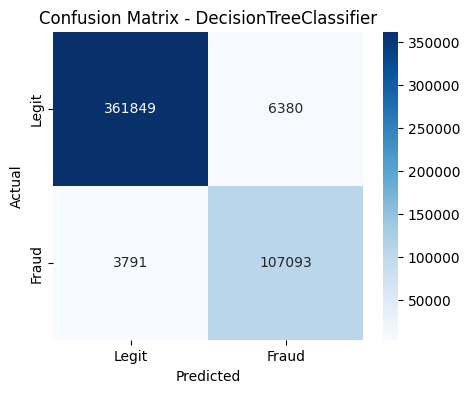

RandomForestClassifier Metrics:
Accuracy: 0.9391
Precision: 0.9343
Recall: 0.7925
F1 Score: 0.8576
ROC-AUC: 0.8879

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    368229
           1       0.93      0.79      0.86    110884

    accuracy                           0.94    479113
   macro avg       0.94      0.89      0.91    479113
weighted avg       0.94      0.94      0.94    479113



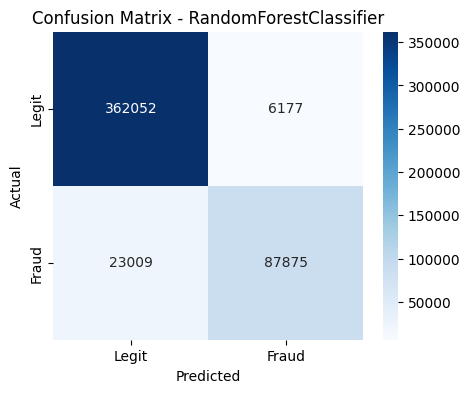

<Figure size 1000x600 with 0 Axes>

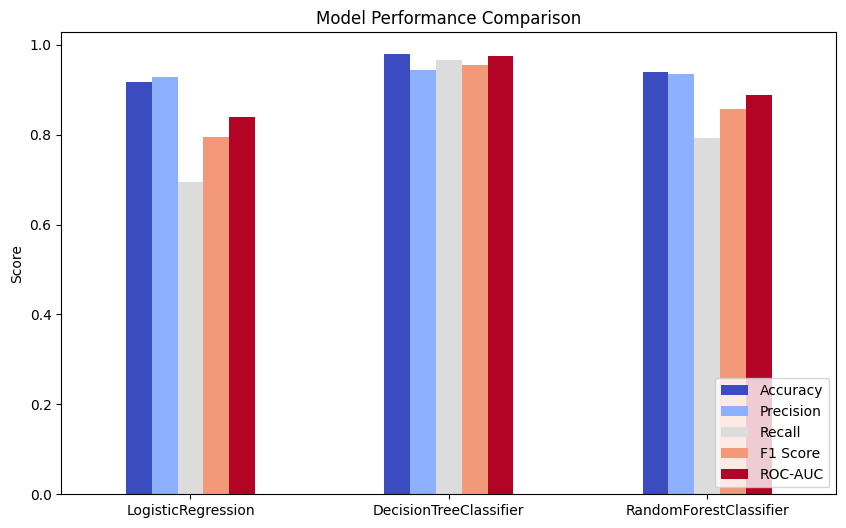

<ipython-input-4-a1d66e21bf31>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=['blue', 'red'])


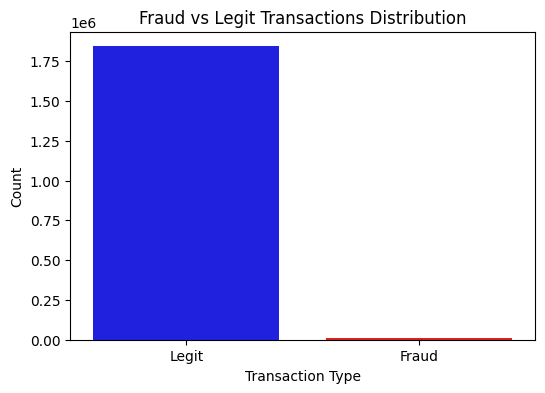

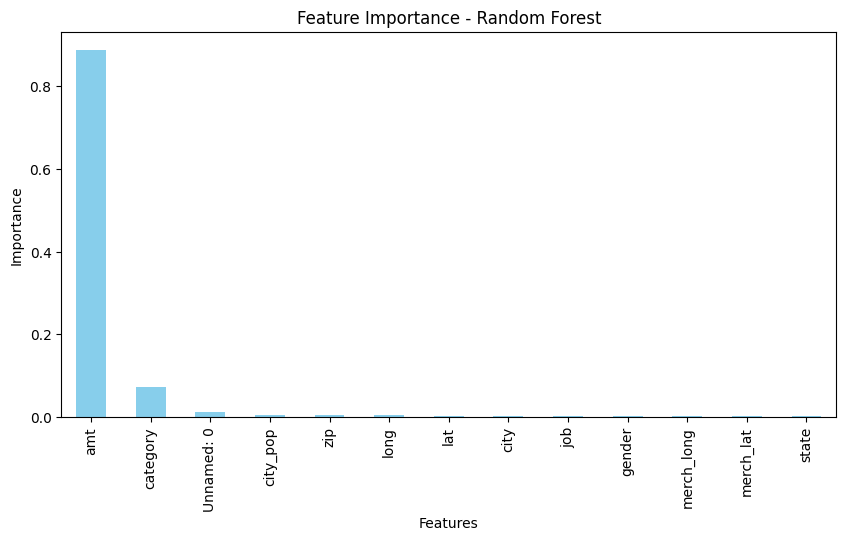

In [ ]:
# Combine train and test for preprocessing consistency
df = pd.concat([df_train, df_test], ignore_index=True)

# Drop unnecessary columns
drop_cols = ['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'dob', 'trans_num', 'unix_time', 'merchant']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True, errors='ignore')

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_enc = LabelEncoder()
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

# Define features and target
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Model training and evaluation
def train_and_evaluate(model, X_train, X_test, y_train, y_test, results_dict):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    results_dict[model.__class__.__name__] = [accuracy, precision, recall, f1, roc_auc]

    print(f"{model.__class__.__name__} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}\n")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, model.__class__.__name__)

# Dictionary to store model results
results = {}

# Initialize models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)

# Train and evaluate each model
train_and_evaluate(log_reg, X_train, X_test, y_train, y_test, results)
train_and_evaluate(decision_tree, X_train, X_test, y_train, y_test, results)
train_and_evaluate(random_forest, X_train, X_test, y_train, y_test, results)

# Convert results dictionary to DataFrame for visualization
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'])

# Plot performance comparison
plt.figure(figsize=(10, 6))
results_df.T.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Fraud distribution plot
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette=['blue', 'red'])
plt.title("Fraud vs Legit Transactions Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Legit", "Fraud"])
plt.show()

# Feature importance from Random Forest
feature_importances = pd.Series(random_forest.feature_importances_, index=df.drop(columns=['is_fraud']).columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [ ]:
# Identify the best model based on F1-score and ROC-AUC
best_model = results_df.loc['F1 Score'].idxmax()
best_auc_model = results_df.loc['ROC-AUC'].idxmax()

print(f"The best model based on F1 Score is: {best_model}")
print(f"The best model based on ROC-AUC Score is: {best_auc_model}")

# Conclusion
print("\nConclusion:")
if best_model == best_auc_model:
    print(f"{best_model} is the best-performing model overall as it has the highest F1-score and ROC-AUC, meaning it balances precision and recall effectively.")
else:
    print(f"{best_model} performed best in F1-score, meaning it balances fraud detection well, while {best_auc_model} had the highest ROC-AUC, indicating strong overall classification capability.")

print("This analysis helps determine which model is optimal for fraud detection in credit card transactions.")


The best model based on F1 Score is: DecisionTreeClassifier
The best model based on ROC-AUC Score is: DecisionTreeClassifier

Conclusion:
DecisionTreeClassifier is the best-performing model overall as it has the highest F1-score and ROC-AUC, meaning it balances precision and recall effectively.
This analysis helps determine which model is optimal for fraud detection in credit card transactions.
